<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 6 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 10 October 2019</div>

# Warm-up 
What do the following sentences have in common?

- Was it a rat I saw?
- Do geese see God?
- Never odd or even!
- King are you glad you are king?

We study the... 

# Celtics

<br />
<center>
    <img src="ipynb.images/celtics.gif" width=200 />
</center>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from scipy import stats
%matplotlib inline

# Big Data? Big Deal..

Remember [this](https://www.mathsisfun.com/data/quincunx.html) experiment?

The **Central Limit Theorem** states that if you have a collection of random variables and sum them up, then the *larger* the collection, the *closer* the sum will be to a *normal distribution* (also called a *Gaussian distribution* or a *bell-shaped curve*). This illustrates why Data Science with **Big Data** is not really a challenge at all (other than how to store and compute with data that is larger than the RAM on your laptop)! If you have tons of data, then frequentist and Bayesian statistics ***coincide***, there is little doubt about outcomes, and it is clear which outcome to place your bets on.

The challenge is with **small data**, where there is doubt and you have no idea of the pdf, and you have to painstakingly  build a model with parameters, and refine your parameters so the model fits the data. When my Bayesan algorithms don;t converge (as you;ve witnessed in class), it's usually because the dataset was too small.

Why do accidents happen in autonomous vehicles when it snows, at dusk, when the moon is behind a traffic light, and a pedestrian is crossing the street on a red light? Precisely because we don't have a lot fo datapoints about that use case, and the autonomous car has **no idea what to do**! Uber needs *you* to program it for the small data cases. Big Data is piece of cake!

A **histogram** is a probability density function (pdf) that we get from data collection or from analytic curves. If we have the 2D function `f(x,y)`, we can estimate the discretized probability density function (pdf) of `f` by computing how many values of `f` fall into specific bins with prespecified values of y.

Clear?

- Exercise: Plot the pdf of the following graph:
<br />
<center>
    <img src="images/graph.png" width=200 />
</center>

# 2017 season

Llet's take 5 random variables reprsenting the per-game scores of the 5 Celtics starters for the season 2017 (Jayson Tatum or JT, Jaylen Brown or JB, Terry Rozier or TR, Al Horford or AL, and Aron Baynes or AB), and then sum them together to form the team score. 

The scores here are imaginary and we use functions `gauss`, `triangular`, `vonmisesvariate`, and `uniform`. 

For the real season scores of  any season, visit [here](http://www.nba.com/celtics/stats?sort=PTS). 

Each random variable/player is represented as a probability distribution function; calling the function returns a single sample from the distribution:

In [32]:
from random import gauss, triangular, choice, vonmisesvariate, uniform

def JT(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
def JB(): return posint(gauss(10.2, 3) + 3 * triangular(1, 3.5, 9)) # 22.1
def TR(): return posint(vonmisesvariate(30, 2) * 3.08) # 14.0
def AH(): return posint(gauss(6.7, 1.5) if choice((True, False)) else gauss(16.7, 2.5)) # 11.7
def AB(): return posint(triangular(5, 17, 25) + uniform(0, 30) + gauss(6, 3)) # 37.0

def posint(x): "Positive integer"; return max(0, int(round(x)))

---

## Note

random.vonmisesvariate(mu, kappa)
冯·米塞斯分布（von Mises distribution）指一种圆上连续概率分布模型，它也被称作循环正态分布（circular normal distribution）

---

Here is a function to sample a random variable *k* times, show a histogram of the results, and return the mean:

In [33]:
from statistics import mean

def repeated_hist(rv, bins=10, k=100000):
    "Repeat rv() k times and make a histogram of the results."
    samples = [rv() for _ in range(k)]
    plt.hist(samples, bins=bins, color='green')
    return mean(samples)

The two top-scoring players for 2017, Jayson Tatum (JT) and Jaylen Brown (JB), have scoring distributions that are slightly skewed from normal:

30.10729

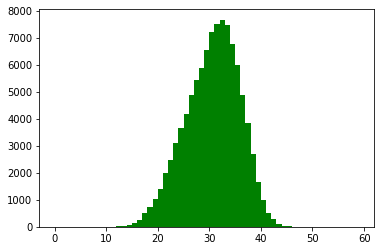

In [34]:
repeated_hist(JT, bins=range(60))

22.14962

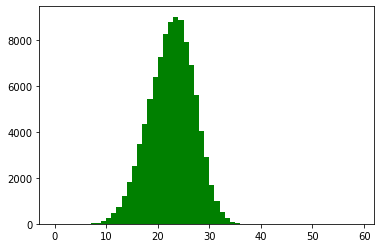

In [35]:
repeated_hist(JB, bins=range(60))

The next two players have **bi-modal** distributions; some games they score a lot, some games not. In other words, they have good days and bad days. For AH, *really bad days*.

14.03373

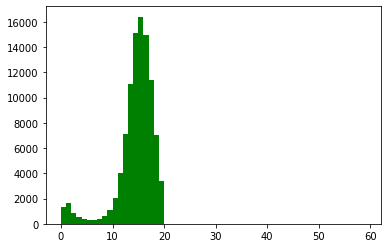

In [36]:
repeated_hist(TR, bins=range(60))

11.67929

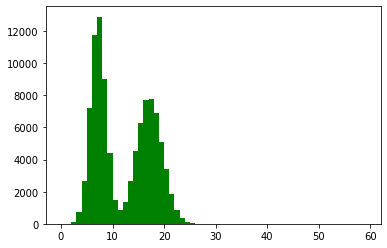

In [37]:
repeated_hist(AH, bins=range(60))

The fifth "player" (actually the sum of all the other players on the team, not really Aron Baymes, or they would have easily defeated the Cavaliers in 2017!) looks like this:

36.30473

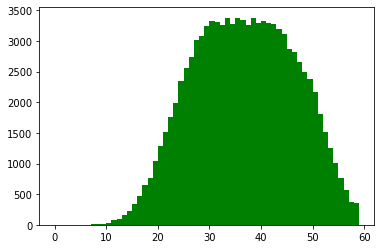

In [38]:
repeated_hist(AB, bins=range(60))

Go ahead, add more players to the Celtics, each with their own scoring distribution. Modify and use the below template:
```python
def XX(): return posint(gauss(15.1, 3) + 3 * triangular(1, 4, 13)) # 30.1
```

Add then in the cell below:

Now, we define the team score to be the sum of the five players, and look at the distribution!

Don't forge to add your own players!

114.24416

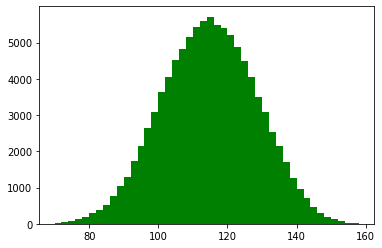

In [39]:
def GSW(): return JT() + JB() + TR() + AH() + AB()  # + ... add your own players!

repeated_hist(GSW, bins=range(70, 160, 2))

### Holy cow! 

<br />
<center>
    <img src="images/holy-cow.jpg" width=300 />
</center>

This looks very much like a **normal distribution**! The Central Limit Theorem ***holds***, and that is why the statistics of NBA teams are so *predictable*. 

When you have a lot of data, you have little doubt, and the Data Science is *easy*. 

Bayesian statistics help you tackle the hard cases, *where there is doubt*.

# A frequentist model

In a Basketball game, you have 4 quarters of 12 minutes each. Given the information on the first quarter, can you predict the final result? 

For instance, suppose the Celtics made $x$ baskets in the first quarter. Then, the probability of making a basket in a given second is: $p = x / 720$ (720 seconds in a quarter). This is completely alike our F1 data experiment.

In a complete game you have 2880 seconds, therfore, the final score follows a **binomial distribution** with parameters $p$ and $n = 2880$: The discrete probability distribution of the number of baskets in a sequence of n independent shooting attempts, each asking a made/missed question, and each with its own boolean-valued outcome: success (with probability p) or missed (with probability q = 1 − p).

The probability of getting exactly k baskets in n attempts is given by the **probability mass function**:

$$f(k,n,p) = (^n_k)\;p^k (1 - p)^{n-k}$$

where 

$$(^n_k) = \frac{n!}{k!\;(n-k)!}$$

Suppose the Celtics score 26 points in the first quarter. What's the probability for the final score?

Let's generate 1,000 variates, and look at the histogram!

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

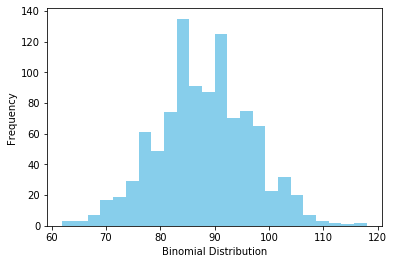

In [40]:
from scipy.stats import binom
data_binom = binom.rvs(n=2880,p=22./720.,size=1000)

ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

So the best probability is that they score around 89 points (the mean), with a standard deviation of +/- 10 points.

# Celtics vs Cavaliers, Game 1

In the first quarter of Game 1 of the playoffs, the result was 29 for the Cavs to 26 for the Celts, from 40 shooting attempts by the Cavs, and 30 shooting attempts by the Celtics. Using this data, what's the predicted outcome for the game?

- Note: p is a **point-estimate** here

Let's **simulate** by producing **random variates** from the binomial distribution. Let's do this 1,000 times, and look at the histogram.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Game 1')]

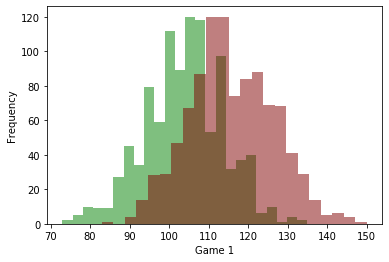

In [41]:
celtics = binom.rvs(n=2880,p=26./720.,size=1000)
cavaliers = binom.rvs(n=2880,p=29./720.,size=1000)

ax = sns.distplot(celtics,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax = sns.distplot(cavaliers,
                  kde=False,
                  color='maroon',
                  hist_kws={"linewidth": 15,'alpha':0.5})
ax.set(xlabel='Game 1', ylabel='Frequency')

As you can see, it's clear that the Cavs were going to win the game. What's the probability that the Cavs will win the game?

Well, it's the probability that `cavaliers > celtics`, right? So let's ***count*** the number of favorable cases over the number of all possible cases in our simulation:

In [42]:
total = 0
favorable = 0
for i in range(1000):
    for j in range(1000):
        total += 1
        if (cavaliers[i] > celtics[j]):
            favorable += 1
            
print(favorable/total)

0.778237


Since you now have a **model**, you know that you can do all your statistics on your model instead of counting, as we did in the beginning of the class. That's what professor told you: ***With a model, you can throw away all your data***!

That is the ***power*** of having a ***model***! That is why **Bayesian analysis** is superior to plain vanilla **Machine Learning**: computers do not yield a **model**. They only yield **point estimates** (at the end of the semester I will teach you how to make computers yield pdfs)!

In [43]:
(cavaliers > celtics).mean()

0.781

So there is about a 78% probability that the Cavs are going to win, and thus only a 22% probability that the Celtics are going to win. And this even though the Celtics ***shoot better*** (score 26 points from 30 attempts) than the Cavaliers (shooting 29 of 40).

Doesn't really sound like our model is correct, right?

<br />
<center>
    <img src="ipynb.images/droopy-dog.gif" width=100 />
</center>

# The beta distribution

We introduce a *new* distribution to the mix to try to improve our model.

Whereas the Poisson distribution is a *count* statistic, the [Beta](https://en.wikipedia.org/wiki/Beta_distribution) distribution can be thought of as representing a *distribution of probabilities*, that is, it represents ***all the possible values of a probability when we don't know what that probability is***. The domain of the Beta distribution is (0, 1), just like a probability, so we already know we're on the right track.

The beta distribution has two parameters, usually denoted $\alpha$ and $\beta$. They are [concentration parameters](https://en.wikipedia.org/wiki/Concentration_parameter), which are a class of parameters that govern probability distributions over.. probability distributions! 

Concentration parameters have an interesting property: The smaller they are, the more **sparse** the distribution is. In the case of the Beta distribution, as $α,β→0$, more and more of the probability is concentrated on the probability parameter p being 0 or 1. 

Another interesting property of a concentration parameter is that when they all equal one, all possibilities are equally likely.

But there's another property that is even ***neater***: Imagine a player's statistics have ***changed***. We have to then update our probabilities: We want to shift this entire curve over just a bit to reflect our new information (and also squish it in a bit since standard eviation is reduced). The math for proving this is [complicated](https://en.wikipedia.org/wiki/Conjugate_prior#Example), but the result is very simple: The new beta distribution will be:

$$ \text{Beta}(\alpha_0 + \text{baskets}, \beta_0 + \text{misses})$$
 
Where $α_0$ and $β_0$ are the parameters we started with! ***Neat***, right?

This result also means the **Beta** is also **self-conjugate** (the posterior is in the same analytic family as the prior), like the gaussian. Also, the Beta distribution is well-known to be conjugate prior to the binomial distribution.

### Example

We know from [here](https://www.basketball-reference.com/leagues/NBA_stats_per_game.html) that an NBA-level basketball player has a season-long 3-point shooting average of around .350 (same as a good baseball player's ERA. Strange strange, strange...), like we know the average **number** (count) of text msgs I can expect my girlfriend to receive per day before I get worried too much.

The basketball player can get into a lucky streak and get an average of 1.000, or an unlucky streak with an average of 0, neither of which are a good predictor. Let's go in with prior expectations: In history, most NBA season 3-point averages have hovered between something like .300 and .350.

Let's compare a european basketball league with the NBA.
Let's plot a Beta distribution with parameters α=80 and β=250. The mean for a beta distribution is always (computed *analytically*):

$$ \frac{\alpha}{\alpha + \beta} = \frac{80}{80+250} =.242$$

and the distribution lies within a ***sub-par range*** for an NBA 3-point shooting average. See below.

In [45]:
import pymc3 as pm

In [ ]:
with pm.Model() as NBA_model:
    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


(array([ 0.51303203,  1.88111743,  1.71010675,  3.76223485,  7.69548038,
         7.69548038, 11.62872591, 12.99681131, 16.41702481, 16.93005684,
        18.29814224, 16.58803549, 15.04893941,  9.91861916, 11.62872591,
         6.49840566,  3.4202135 ,  2.7361708 ,  2.22313878,  1.53909608,
         0.51303203,  0.85505338,  0.17101068,  0.17101068,  0.        ,
         0.17101068]),
 array([0.18166812, 0.18751571, 0.1933633 , 0.19921089, 0.20505848,
        0.21090606, 0.21675365, 0.22260124, 0.22844883, 0.23429642,
        0.24014401, 0.24599159, 0.25183918, 0.25768677, 0.26353436,
        0.26938195, 0.27522953, 0.28107712, 0.28692471, 0.2927723 ,
        0.29861989, 0.30446748, 0.31031506, 0.31616265, 0.32201024,
        0.32785783, 0.33370542]),
 <a list of 26 Patch objects>)

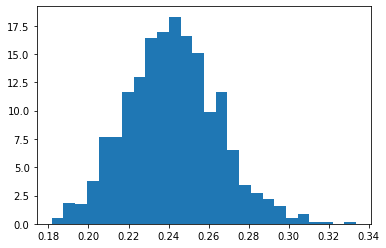

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

data = stats.beta.rvs(80, 250, loc = 0, scale = 1, size=1000)
plt.hist(data,bins='auto',normed=True)

Imagine now the basketball player gets his first attempt at a 3-pointer and swooshes the net (makes the basket). His record for the season is now 1 3-pointer; 1 attempt. 

We update our probabilities by shifting the entire curve over just a bit to reflect our new information. The new Beta distribution will be:

$$ \text{Beta}(\alpha_0 + \text{hits}, \beta_0 + \text{misses})$$
 
Where $α_0$ and $β_0$ are the parameters we started with: 80 and 250. Thus, in this case, $α$ has increased by 1 (his one hit), while $β$ has not increased at all (no misses yet). 

Suppose halfway through a season in the Greek leagues, [Γιάννης Αντετοκούνμπο](https://www.protothema.gr/sports/article/933785/astamatitos-o-giannis-adetokounbo-stin-premiera-tou-se-filiko-ton-baks/) gets 300 3-point shot attempts, making the basket 150 out of those times. Let's plot!

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


(array([ 0.55883796,  0.55883796,  0.37255864,  1.11767592,  2.23535184,
         3.35302776,  8.56884872, 11.36303852, 13.41211104, 15.27490424,
        20.4907252 , 21.4221218 , 15.27490424, 16.7651388 , 15.46118356,
        12.48071444, 11.73559716,  6.70605552,  3.53930708,  2.98046912,
         1.11767592,  0.74511728,  0.74511728]),
 array([0.30098805, 0.30635633, 0.31172462, 0.3170929 , 0.32246118,
        0.32782946, 0.33319775, 0.33856603, 0.34393431, 0.34930259,
        0.35467088, 0.36003916, 0.36540744, 0.37077572, 0.37614401,
        0.38151229, 0.38688057, 0.39224885, 0.39761714, 0.40298542,
        0.4083537 , 0.41372198, 0.41909027, 0.42445855]),
 <a list of 23 Patch objects>)

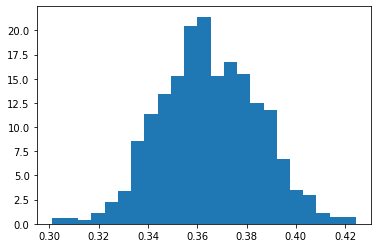

In [15]:
%matplotlib inline

data = stats.beta.rvs(80 + 150, 250 + 150, loc = 0, scale = 1, size=1000)
plt.hist(data,bins='auto',normed=True)

Giannis' 3-point average has definitely improved!

Notice the curve is now both *thinner* (0.44 - 0.34 = 0.10 versus 0.34 - 0.20 = 0.14) and *shifted* to the right (higher scoring percentage) than it used to be: We have a better sense of what the player's 3-point ability is! We know his ability is ***better*** than the greek league average (because the mean is shifted to the right), and we know ***more information*** about the player (because the standard deviation is smaller). So the NBA comes calling and ***recruits*** Giannis to play in Milwaukee!

The **Beta distribution** is best for representing a **probabilistic** ***distribution of probabilities***- the case where we don't know what a probability is *in advance*, but we have *reasonable guesses*.

# Bayesian Basketball

The model we used so far was a **frequentist model**. We model the number of baskets given the probability of making a basket in a given minute. But, this probability is a random variable and we don’t have any model for it. Boo!

The Bayesian approach will augment this by modelling the probability of making a basket in a given minute as a **random variable** $p$. This will affect the results in two ways:

- We are going to extract *more* information in the inference process, i.e. the first quarter of the game
- We will *improve the prediction* of the final result

## The Model

We know that $p$ is a **probability**, thus it can be anywhere between 0 and 1. Therefore, we know that $p$ is distributed as a uniform variable in (0,1) which is equivalent to a **Beta** distribution with parameters $\alpha = 1$ and $\beta = 1$. 

Also, we know that the probability $p$ of making $k$ baskets in the first quarter follows a **Binomial** distribution. 

Using these two facts, we want to compute the distribution of $p$ given the number of baskets in the fist quarter: the **posterior distribution**. This also happens to be a **Beta** distribution, now with updated parameters $\alpha = 1 + k$ and $\beta = n — k + 1$ as we saw above.

In our particular case we have: $p = \text{Beta}(26+1, 30+1)$ for the Celtics and $p = \text{Beta}(29+1, 40+1)$ for the Cavaliers. Note that previously, we had inferred $p$ as a **point-estimate**, and now we have a **pdf**.

## The simulation

For the prediction, we are going to use the Binomial distribution for the number of baskets, which is similar to the previous model. 

But this time we are using a **distribution** for the probability of making a basket in a given minute, ***not a pont estimate as before***! 

When we put both things together, the **Beta** distribution and the **Binomial** distribution, a compound distribution arises: the **Beta-binomial** distribution. 

With this distribution, we can compute the probability of every possible result *analytically*, and we can simulate results to get a better understanding of our model.

For the Celtics and the Cavaliers, we draw a probability $p$ of making baskets from the Beta distribution. Using $p$, we draw from a Binomial(p, 2770) all possible results. Repeat N times, with N large enough!

When we use the simple binomial model, the probability for the Celtics to win the match was less than 1%. With the Beta-Binomial model the probability is 12.6%!

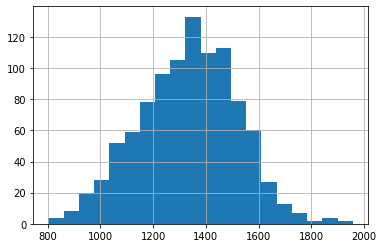

In [79]:
pCeltics = pd.Series(stats.beta(26, 30).rvs(n))
celts = pCeltics.apply(lambda p: stats.binom(k, p).rvs())
celts.name = 'Celtics'
celts.hist(bins=20)

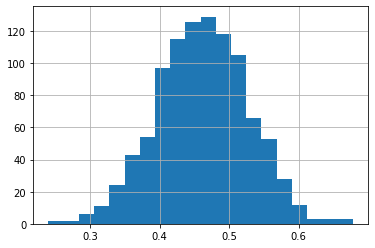

In [63]:
n = 1000
k = 2880

pCeltics = pd.Series(stats.beta(26, 30).rvs(n))
pCeltics.hist(bins=20)

In [ ]:
pCeltics = pd.Series(stats.beta(26, 30).rvs(n))

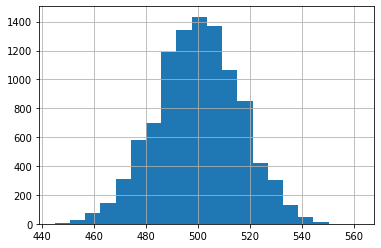

In [82]:
pd.Series(stats.binom(1000,0.5).rvs(10000)).hist(bins=20)

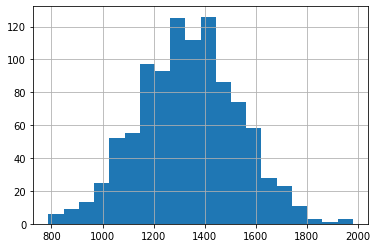

In [55]:
celts = pCeltics.apply(lambda p: stats.binom(k, p).rvs())
celts.name = 'Celtics'
celts.hist(bins=20)

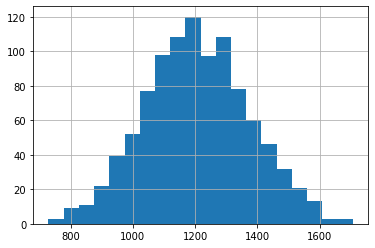

In [50]:
pCavs = pd.Series(stats.beta(29, 40).rvs(n))
cavs = pCavs.apply(lambda p: stats.binom(k, p).rvs())
cavs.name = 'Cavaliers'
cavs.hist(bins=20)

Text(0.5, 1.0, 'Beta-Binomial')

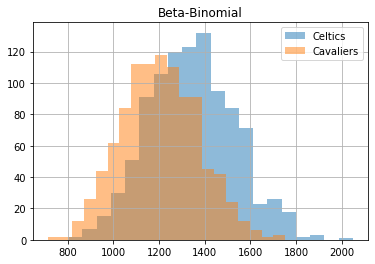

In [18]:
celts.hist(bins=20, alpha=0.5, label='Celtics')
cavs.hist(bins=20, alpha=0.5, label='Cavaliers')
plt.legend()
plt.title('Beta-Binomial')

What;s the probability the Celtics will win the game?

In [19]:
(celts > cavs).mean()

0.712

Wow, the Celtics now have a ***better*** probability of winning the game than the Cavaliers! Compare this to our ***old*** histograms:

In [20]:
old_celts = pd.Series(stats.binom(2880, 26./720).rvs(n))
old_cavs = pd.Series(stats.binom(2880, 29./720).rvs(n))

Text(0.5, 1.0, 'Binomial')

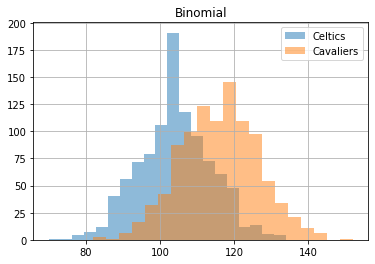

In [21]:
old_celts.hist(bins=20, alpha=0.5, label='Celtics')
old_cavs.hist(bins=20, alpha=0.5, label='Cavaliers')
plt.legend()
plt.title('Binomial')

In [22]:
(old_celts > old_cavs).mean()

0.196

Let's run a **simulation**:

In [23]:
def bootsrap(n):
    comparison = celts > cavs
    results = []
    for i in range(n):
        index = np.random.choice(comparison.index, celts.count(), replace=True)
        results.append(comparison.ix[index].mean())
    return pd.Series(results)

In [24]:
simulation = bootsrap(1000)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Text(0.5, 1.0, 'Bootstrapping the proability of Celtics winning Game 1')

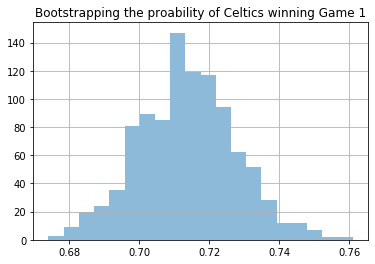

In [25]:
simulation.hist(bins=20, alpha=0.5)
plt.title('Bootstrapping the proability of Celtics winning Game 1')

In [26]:
simulation.describe()

count    1000.000000
mean        0.713684
std         0.013955
min         0.674000
25%         0.704000
50%         0.714000
75%         0.722000
max         0.761000
dtype: float64

## Frequentist or Bayesian?

The simple Binomial model only used the ratio of the number of baskets to seconds. For the Celtics and Cavs we have 26/720, which is the same as 260/7200 and 2600/72000. 

But, in the Bayesian model we say that is not the same to do a prediction using 12 minutes of data as with using 48, or 1,000 minutes of data. If we have ***more*** information, our prediction *should* be ***more accurate***!

Will we get different results if we increase the sample size, from 26/720 to 260/7200 to 2600/72000? We always need to **verify** our results!

We know that bayesian results will eventually converge to frequentist results when the amount of information is large enough. But did we model the numer of shooting attempts in our frequentist model at all? ***We did not***! 

So let's test to see if our result is *independent* of the size of the data sample. 

In [27]:
def betaBinomial(alpha, beta, n, k):
    p = pd.Series(stats.beta(alpha, beta).rvs(n))
    return p.apply(lambda p: stats.binom(k, p).rvs())

In [28]:
def resultsForXTimesBigger(x=1):
    n = 100
    celts = betaBinomial(26*x +1, 30*x +1, n, k)
    cavs = betaBinomial(29*x +1, 40*x +1, n, k)
    return (celts > cavs).mean()

In [29]:
space = np.logspace(1, 4, 10)
resultsByIncrement = pd.Series([resultsForXTimesBigger(x) for x in space], index=space)

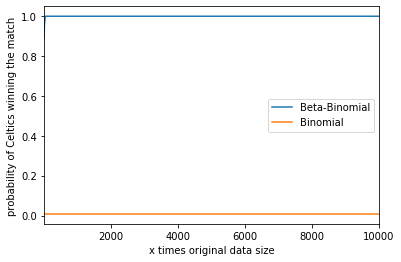

In [30]:
resultsByIncrement.plot(label='Beta-Binomial')
resultsByIncrement.apply(lambda x: 0.008).plot(label='Binomial')
#plt.yscale('log') no need!
#plt.xscale('log')
plt.xlabel('x times original data size')
plt.ylabel('probability of Celtics winning the match')
plt.legend()

# Conclusion

In all cases, Celtics win!

<br />
<center>
    <img src="images/boston-celtics.jpg" width=200 />
</center>